In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/GaussFit_spec2D.py

%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_info = gen_dataInfo_from_tfCube(redshift=0.2,sini=0.1,slitAngles=[0.5])

redshift : 0.2
half_light_radius : 0.5
vcirc : 200.0
sini : 0.1
slitWidth : 0.02
slitAngles : [0.5]


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 4.561712741851807 (sec)
total getSlitSpectra time: 1.1878509521484375 (sec)


In [7]:
data_info.keys()

dict_keys(['ModelCube', 'ObsCube', 'image', 'image_variance', 'data', 'grid_lambda', 'grid_pos', 'par_fid', 'lambda_emit'])

In [9]:
data_info['ModelCube'].shape

(256, 256, 160)

In [10]:
data_info['image'].shape

(128, 128)

In [11]:
data_info['image']

array([[ 1.3418803e-04,  1.8036079e-04, -2.8174042e-04, ...,
        -3.2905833e-04,  2.9962967e-04,  2.2440277e-04],
       [-3.7903400e-04, -3.0370429e-05, -3.6546905e-04, ...,
        -5.0056831e-04, -2.8757667e-04,  1.6093579e-04],
       [-1.2051361e-04, -2.9602746e-04,  5.8568312e-05, ...,
         4.1199167e-04,  6.9705777e-07,  2.0866233e-04],
       ...,
       [ 3.6439593e-05, -2.6257994e-04,  1.7423846e-04, ...,
        -6.4205073e-05,  9.0089188e-06,  1.6483261e-04],
       [ 1.7515897e-04, -6.6129440e-05, -1.3760486e-04, ...,
        -1.7184882e-04,  2.9446711e-04,  1.8299774e-05],
       [-1.2268906e-04,  6.7357447e-05,  1.3395496e-04, ...,
        -1.0066355e-04, -9.4908450e-05,  1.7737750e-05]], dtype=float32)

In [3]:
GaussFit = GaussFit_spec2D(data_info)

In [4]:
fitted_peakLambda, fitted_amp, fitted_sigma = GaussFit.gaussFit_spec2D(data=GaussFit.data)

model = GaussFit.model_spec2D(fitted_peakLambda,fitted_amp,fitted_sigma)

time cost in gaussFit_spec2D: 0.17923688888549805 (secs)


In [5]:
data = GaussFit.data

In [6]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/RotationCurveFit.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py

RotFit = RotationCurveFit(data_info, active_par_key=['r_t', 'r_0', 'v_a', 'v_0'])

time cost in gaussFit_spec2D: 0.1700727939605713 (secs)


In [7]:
params_rot = RotFit.optFit_rotation_curve(fitted_peakLambda=RotFit.gaussfit_peakLambda)
params_rot 

{'r_t': 0.4981271365288837,
 'r_0': -0.01118873190214196,
 'v_a': 175.3009316304026,
 'v_0': 0.04806194069925391,
 'redshift': 0.19999999879897068,
 'sini': 0.09999999969614173}

In [7]:
params_rot = RotFit.optFit_rotation_curve(fitted_peakLambda=RotFit.gaussfit_peakLambda)
params_rot 

{'r_t': 0.4981379825250012,
 'r_0': -0.011146088662751706,
 'v_a': 175.7083605096208,
 'v_0': 0.047612185319816015,
 'redshift': 0.19999999858123094,
 'sini': 0.0999999997044158}

In [8]:
lambda_min = np.min(GaussFit.grid_lambda)  ; lambda_MAX = np.max(GaussFit.grid_lambda)
x_min = np.min(GaussFit.grid_pos)          ; x_MAX = np.max(GaussFit.grid_pos)

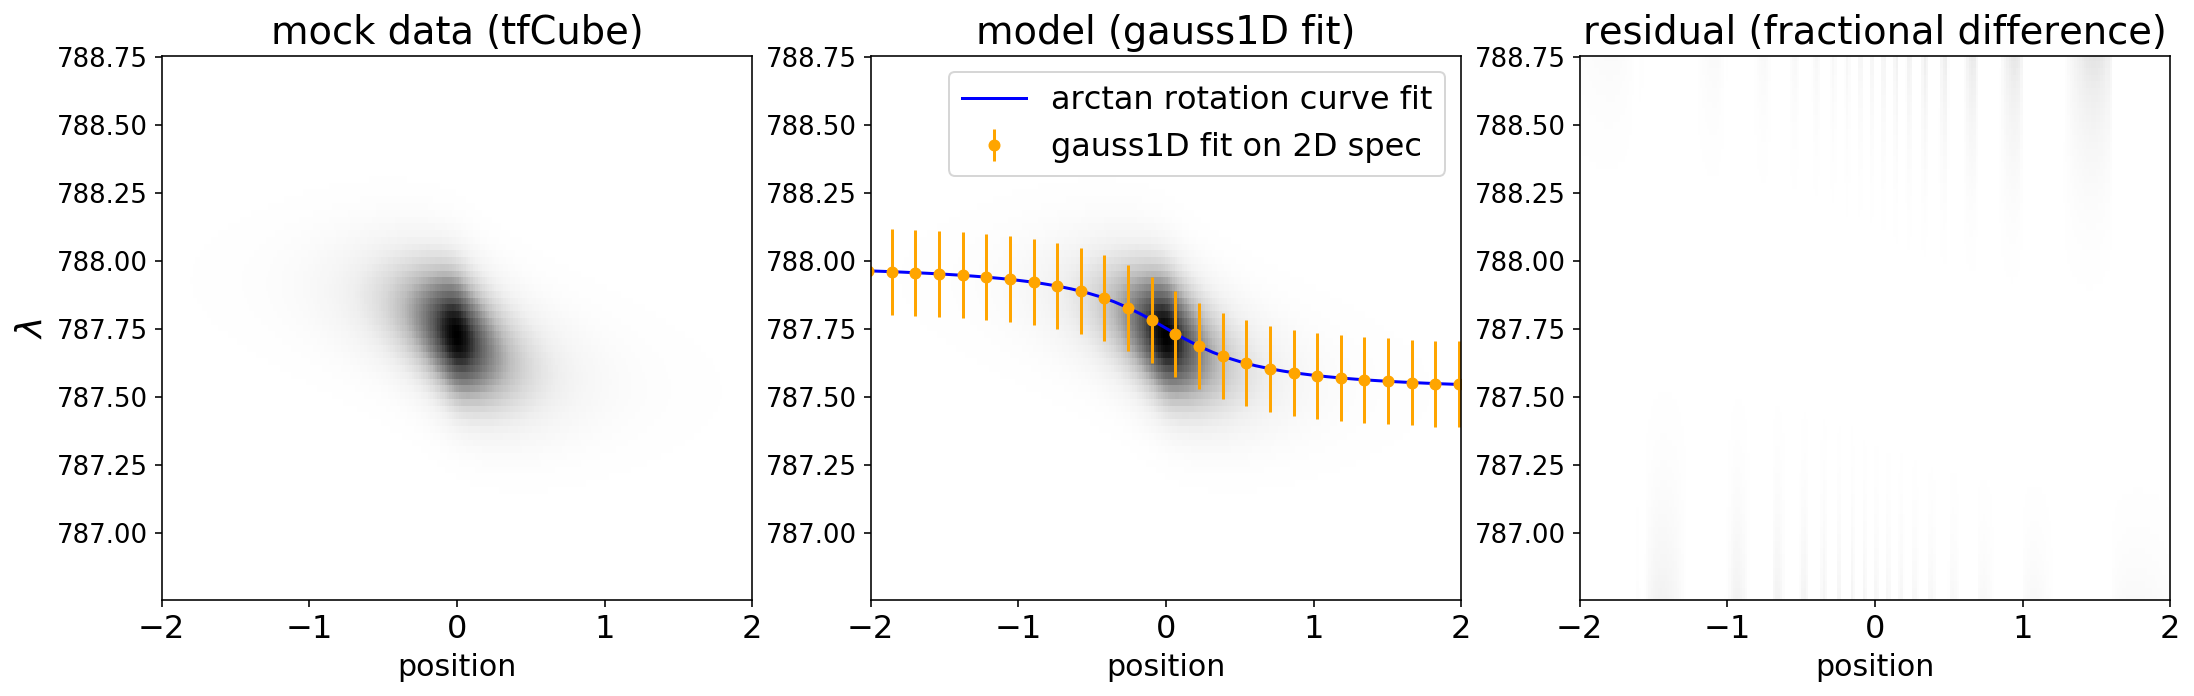

In [9]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
plt.rc('font',size=16)

ax[0].imshow(data.T ,extent=[x_min, x_MAX, lambda_min, lambda_MAX ]       , aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model.T,extent=[x_min, x_MAX, lambda_min, lambda_MAX ]       , aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data.T-model.T)/data.T,extent=[x_min, x_MAX, lambda_min, lambda_MAX ], aspect='auto',cmap='Greys',vmin=0)

#ax[1].plot(GaussFit.peak_info_exact['peak_loc'][::6]         ,np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak (exact)')
#ax[1].plot(GaussFit.fitted_rot_lambdaObs[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot lambdaObs based on peakLambda')
#ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')
ax[1].errorbar(np.flip(GaussFit.grid_pos)[3::10], fitted_peakLambda[3::10], fitted_sigma[3::10] ,color='orange', marker='o', markersize=5,ls='none',label='gauss1D fit on 2D spec')
ax[1].plot(np.flip(GaussFit.grid_pos)[5::6],RotFit.fitted_rot_lambdaObs[5::6],color='b',ls='-',label='arctan rotation curve fit')



#ax[2].plot(peak_info['peak_loc'][::6],np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(GaussFit.approxFit_rot_lambda_peak[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')

vcen = data_info['lambda_emit']*(1.+data_info['par_fid']['redshift'])

for j in range(ncol):
#    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
#    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
#    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
#    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    
    ax[j].set_ylim(vcen-1.0,vcen+1.0)
    ax[j].set_xlim(-2,2)
    ax[j].set_xlabel('position', fontsize=15)
    ax[j].tick_params(axis='x', labelsize=16)
    ax[j].tick_params(axis='y', labelsize=13)

ax[0].set_ylabel(r'$\lambda$', fontsize=18)    
ax[0].set_title('mock data (tfCube)')
ax[1].set_title('model (gauss1D fit)')
ax[2].set_title('residual (fractional difference)')

#ax[1].legend(loc=(2.3,0.75),prop={'size':16})
ax[1].legend(loc="best",prop={'size':16})

plt.show()

In [10]:
fitted_sigma

array([-0.15830189, -0.15829714, -0.15829177, -0.15828577, -0.15827909,
       -0.15827172, -0.15826362, -0.15825476, -0.15824511, -0.15823464,
       -0.15822331, -0.15821108, -0.15819792, -0.15818379, -0.15816864,
       -0.15815244, -0.15813513, -0.15811667, -0.15809701, -0.1580761 ,
       -0.15805389, -0.15803027, -0.15800536, -0.15797905, -0.15794994,
       -0.15792226, -0.15789135, -0.15785104, -0.15783996, -0.15786267,
       -0.15790328, -0.15793914, -0.15796986, -0.15800285, -0.15803424,
       -0.15806444, -0.15809369, -0.1581217 , -0.15814845, -0.15817381,
       -0.15819768, -0.15821995, -0.1582405 , -0.1582592 , -0.15827591,
       -0.1582905 , -0.1583028 , -0.15831265, -0.15831988, -0.15832432,
       -0.15832575, -0.15832399, -0.15831879, -0.15830994, -0.15829719,
       -0.15828028, -0.15825891, -0.15823283, -0.15820163, -0.15816516,
       -0.15812288, -0.15807422, -0.15802004, -0.15795753, -0.15788643,
       -0.15784989, -0.15792641, -0.15800125, -0.15806655, -0.15

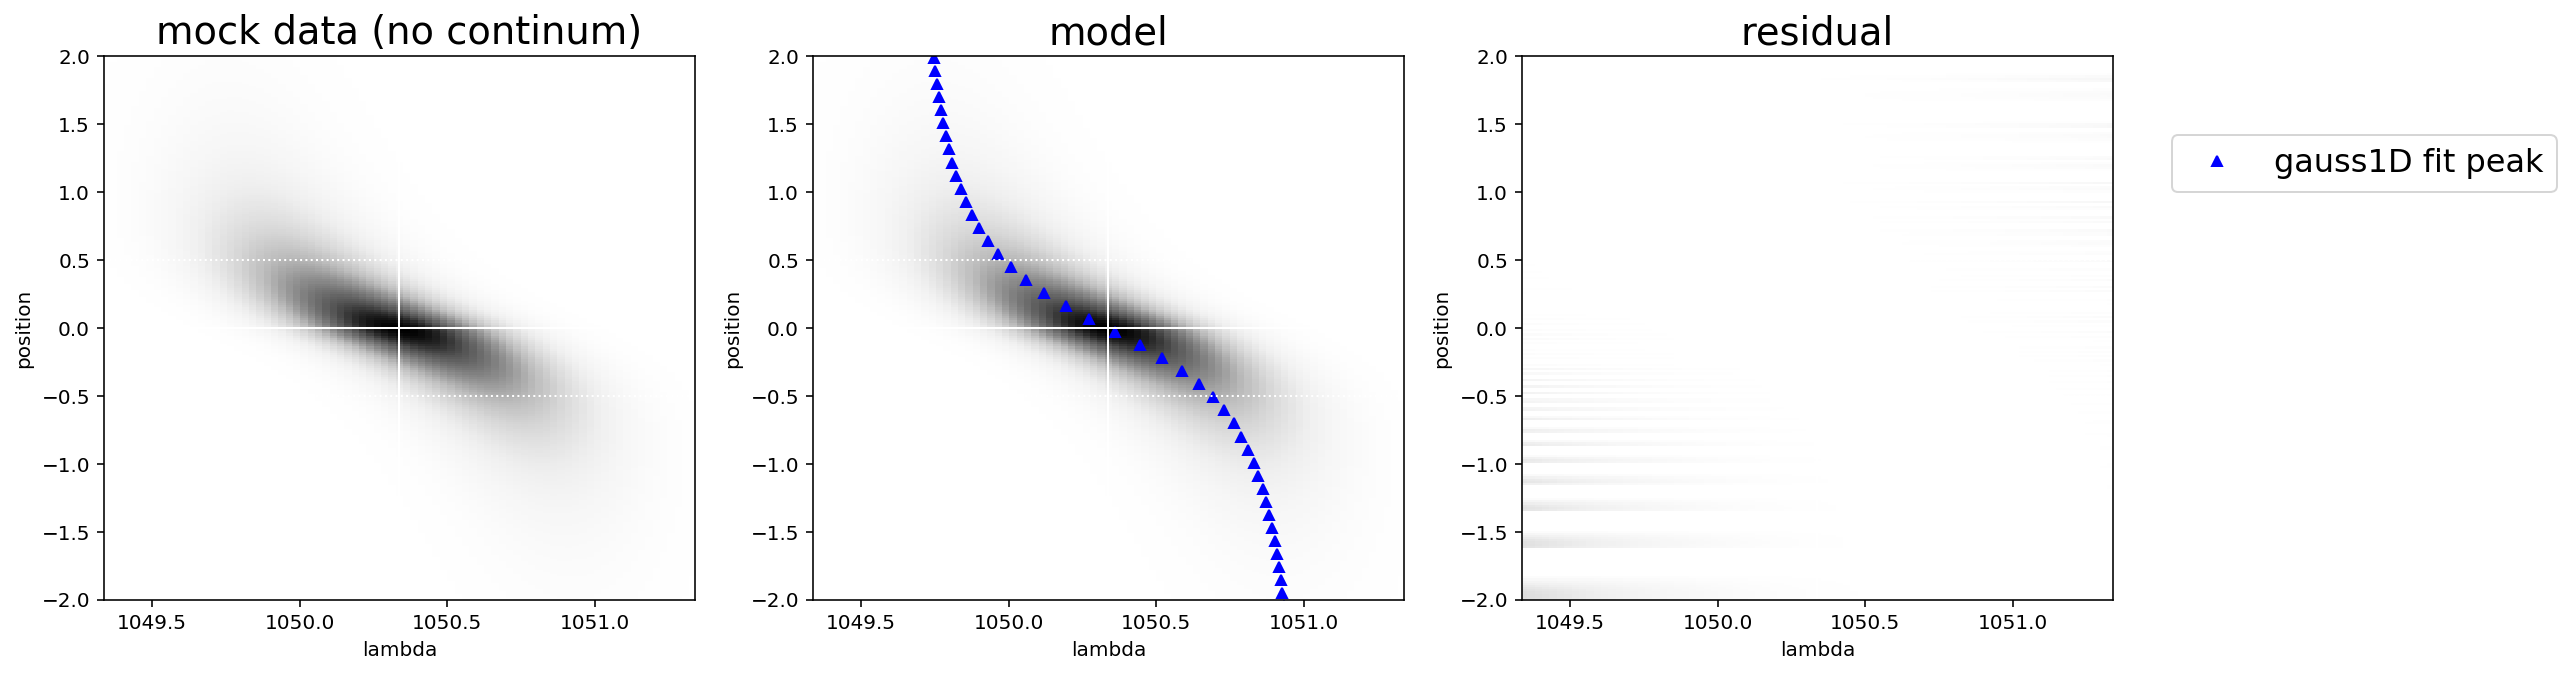

In [14]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
plt.rc('font',size=16)

ax[0].imshow(data ,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data-model)/data,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)

#ax[1].plot(GaussFit.peak_info_exact['peak_loc'][::6]         ,np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak (exact)')
ax[1].plot(fitted_peakLambda[3::6]            ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none',label='gauss1D fit peak')
#ax[1].plot(GaussFit.fitted_rot_lambdaObs[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot lambdaObs based on peakLambda')
#ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')


#ax[2].plot(peak_info['peak_loc'][::6],np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(GaussFit.approxFit_rot_lambda_peak[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')


vcen = data_info['lambda_emit']*(1.+data_info['par_fid']['redshift'])

for j in range(ncol):
    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    
    ax[j].set_xlim(vcen-1.0,vcen+1.0)
    ax[j].set_ylim(-2,2)
    ax[j].set_xlabel('lambda')
    ax[j].set_ylabel('position')
    
ax[0].set_title('mock data (no continum)')
ax[1].set_title('model')
ax[2].set_title('residual')

ax[1].legend(loc=(2.3,0.75),prop={'size':16})

plt.show()

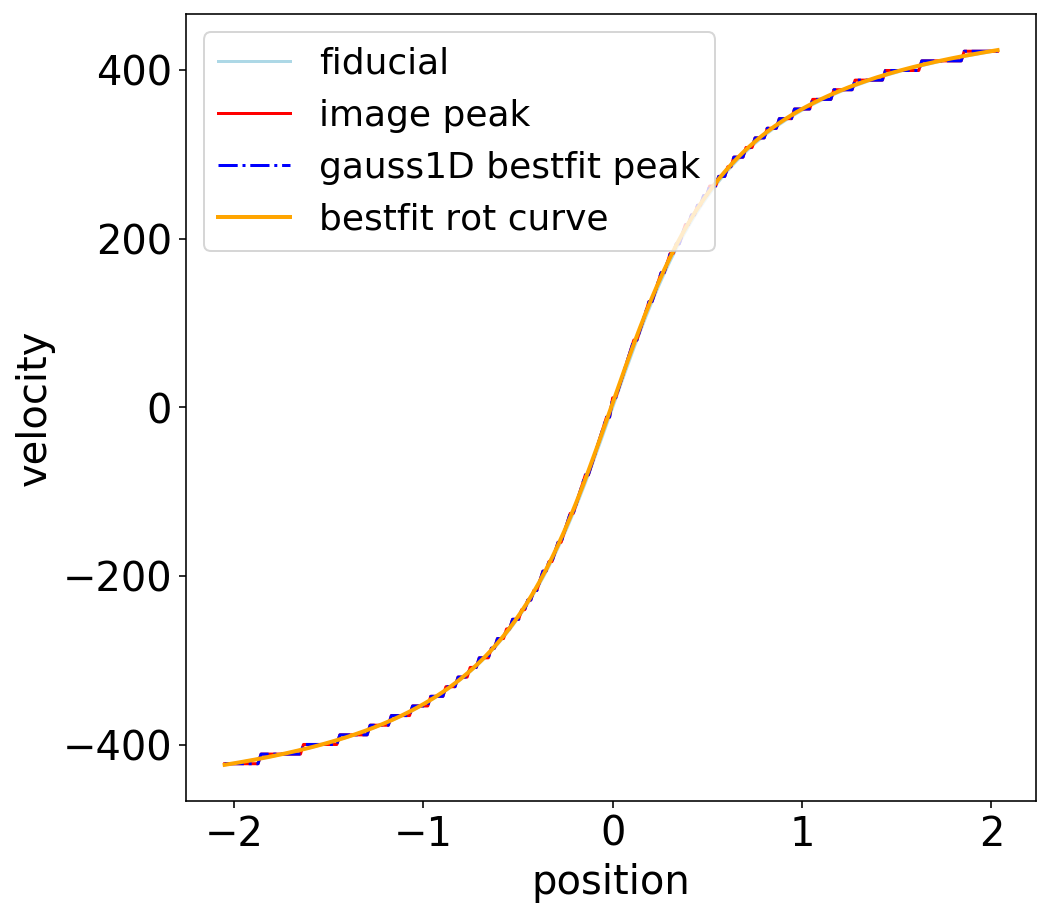

In [19]:
fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.11,0.82,0.84])

ax1.plot(fit_tool.grid_pos,fid_rot_v_peak-v_sys0,label='fiducial',color='lightblue')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='image peak',color='red')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='gauss1D bestfit peak',color='blue',ls="-.")
ax1.plot(fit_tool.grid_pos,fit_tool.approxFit_rot_v_peak-v_sys0,label='bestfit rot curve',color='orange',lw=2)


ax1.set_xlabel('position')
ax1.set_ylabel('velocity')

ax1.legend(loc='best',prop={'size':18})

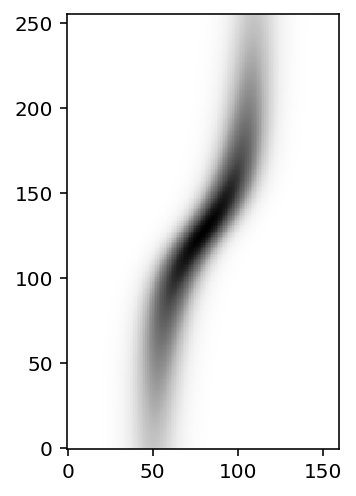

In [17]:
%matplotlib inline
plt.imshow(data_info['data'],cmap=plt.cm.Greys,origin="lower")